In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_quora.csv')
df.shape

(404290, 6)

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.question2[0]

'What is the step by step guide to invest in share market?'

In [5]:
df.question1[0]

'What is the step by step guide to invest in share market in india?'

In [6]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
86693,86693,87443,146163,"What does it mean when someone says ""Don't pat...","What does it mean when someone says ""You're de...",0
384108,384108,48870,68803,What are the foods that reduce tummy fat?,Which exercise is effective to reduce tummy an...,1
5140,5140,10127,10128,What is the difference between the drama and p...,What is the difference between drama and play?,1
133802,133802,44405,213990,What are some things new employees should know...,What are some things new employees should know...,0
187318,187318,285507,285508,How do I get my tap water to taste like bottle...,Does the tap water in Budapest taste a bit met...,0
70932,70932,122152,3308,Why does Quora remove my questions?,What kind of questions get deleted on Quora?,0
273276,273276,217898,391719,What do credit card billing addresses mean and...,How do I manage credit card bills to avoid ove...,0
50827,50827,90236,90237,Has Noam Chomsky ever voted for a US president...,Can presidential candidates vote?,0
244133,244133,356710,356711,What are some good songs to sing a capella?,What are some good songs to sing to a dying pe...,0
225330,225330,333653,333654,Why do I get nausea after eating chocolate?,Why do I get tired after I eat a carb-heavy meal?,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum() # missing values 

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

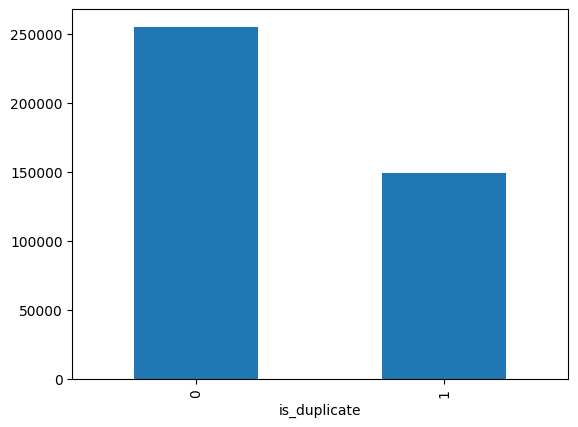

In [10]:
# Distribution of duplicate and non-duplicate questions

print(df.is_duplicate.value_counts())
print((df.is_duplicate.value_counts()/df.is_duplicate.count())*100)

df.is_duplicate.value_counts().plot(kind='bar')

In [12]:
# Repeated questions

qid = pd.Series(df.qid1.tolist() + df.qid2.tolist())
print('Number of unique questions', np.unique(qid).shape[0])

x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


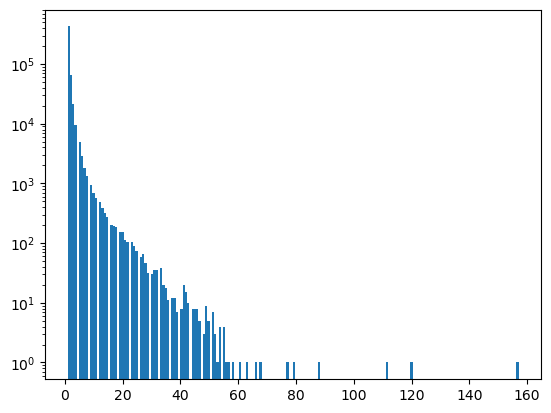

In [14]:
# Repeated questions histogram read again

plt.hist(qid.value_counts().values, bins=200)
plt.yscale('log')
plt.show()

In [15]:
new_df = df.sample(30000)

In [16]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
new_df.duplicated().sum()

0

In [18]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
210488,Why is it that every time I ask Quora a questi...,“How do I ask a question in Quora? I need the ...
307556,What is the difference between 4g LTE & voLTE?,Does Reliance Jio 4G requires a LTE SIM Cards ...
390309,What are the differences between external and ...,"What is internal conflict, and what is externa..."
323985,Obesity: Do saunas help you lose weight?,Do saunas help lose weight? Why or why not?
383880,"Subway has a ""Perfect Bell"" to ring when your ...",What is the healthy customization of a Subway ...


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# Merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=4000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [20]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df1.shape,temp_df2.shape,temp_df.shape

((30000, 4000), (30000, 4000), (30000, 8000))

In [21]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
210488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186681,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,is_duplicate
210488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
307556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
383880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186681,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
401826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:, 0:-1].values, temp_df.iloc[:, -1].values, test_size=0.2, random_state=5)

In [24]:
# training on Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7458333333333333

In [25]:
# training on naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.5435

In [26]:
# Conclusion is, random forest is performing better than GNB.
# To increase the performance, we can add certain features 
# of our choice, basically we have to do feature engineering,
# like adding a feature of number of words in q1, and q1,
# common words in both questions, etc.

In [28]:
# Feature engr:

new_df['q1_len'] = new_df.question1.str.len()
new_df['q2_len'] = new_df.question2.str.len()
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
210488,210488,15919,315046,Why is it that every time I ask Quora a questi...,“How do I ask a question in Quora? I need the ...,1,109,113
307556,307556,87607,296701,What is the difference between 4g LTE & voLTE?,Does Reliance Jio 4G requires a LTE SIM Cards ...,0,46,120
390309,390309,352531,213017,What are the differences between external and ...,"What is internal conflict, and what is externa...",1,64,94
323985,323985,450019,450020,Obesity: Do saunas help you lose weight?,Do saunas help lose weight? Why or why not?,1,40,43
383880,383880,231652,310345,"Subway has a ""Perfect Bell"" to ring when your ...",What is the healthy customization of a Subway ...,0,121,55


In [29]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    
    return len(w1 & w2) # returning the length of intersection of two sets w1 and w2

In [30]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common
210488,210488,15919,315046,Why is it that every time I ask Quora a questi...,“How do I ask a question in Quora? I need the ...,1,109,113,8
307556,307556,87607,296701,What is the difference between 4g LTE & voLTE?,Does Reliance Jio 4G requires a LTE SIM Cards ...,0,46,120,2
390309,390309,352531,213017,What are the differences between external and ...,"What is internal conflict, and what is externa...",1,64,94,7
323985,323985,450019,450020,Obesity: Do saunas help you lose weight?,Do saunas help lose weight? Why or why not?,1,40,43,5
383880,383880,231652,310345,"Subway has a ""Perfect Bell"" to ring when your ...",What is the healthy customization of a Subway ...,0,121,55,5


In [31]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,q1_num_words,q2_num_words
210488,210488,15919,315046,Why is it that every time I ask Quora a questi...,“How do I ask a question in Quora? I need the ...,1,109,113,8,23,24
307556,307556,87607,296701,What is the difference between 4g LTE & voLTE?,Does Reliance Jio 4G requires a LTE SIM Cards ...,0,46,120,2,9,23
390309,390309,352531,213017,What are the differences between external and ...,"What is internal conflict, and what is externa...",1,64,94,7,9,15
323985,323985,450019,450020,Obesity: Do saunas help you lose weight?,Do saunas help lose weight? Why or why not?,1,40,43,5,7,9
383880,383880,231652,310345,"Subway has a ""Perfect Bell"" to ring when your ...",What is the healthy customization of a Subway ...,0,121,55,5,22,9


In [32]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    
    return (len(w1) + len(w2))
    

In [33]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,q1_num_words,q2_num_words,word_total
210488,210488,15919,315046,Why is it that every time I ask Quora a questi...,“How do I ask a question in Quora? I need the ...,1,109,113,8,23,24,41
307556,307556,87607,296701,What is the difference between 4g LTE & voLTE?,Does Reliance Jio 4G requires a LTE SIM Cards ...,0,46,120,2,9,23,31
390309,390309,352531,213017,What are the differences between external and ...,"What is internal conflict, and what is externa...",1,64,94,7,9,15,20
323985,323985,450019,450020,Obesity: Do saunas help you lose weight?,Do saunas help lose weight? Why or why not?,1,40,43,5,7,9,15
383880,383880,231652,310345,"Subway has a ""Perfect Bell"" to ring when your ...",What is the healthy customization of a Subway ...,0,121,55,5,22,9,31


In [34]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,q1_num_words,q2_num_words,word_total,word_share
210488,210488,15919,315046,Why is it that every time I ask Quora a questi...,“How do I ask a question in Quora? I need the ...,1,109,113,8,23,24,41,0.20
307556,307556,87607,296701,What is the difference between 4g LTE & voLTE?,Does Reliance Jio 4G requires a LTE SIM Cards ...,0,46,120,2,9,23,31,0.06
390309,390309,352531,213017,What are the differences between external and ...,"What is internal conflict, and what is externa...",1,64,94,7,9,15,20,0.35
323985,323985,450019,450020,Obesity: Do saunas help you lose weight?,Do saunas help lose weight? Why or why not?,1,40,43,5,7,9,15,0.33
383880,383880,231652,310345,"Subway has a ""Perfect Bell"" to ring when your ...",What is the healthy customization of a Subway ...,0,121,55,5,22,9,31,0.16


In [35]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
210488,Why is it that every time I ask Quora a questi...,“How do I ask a question in Quora? I need the ...
307556,What is the difference between 4g LTE & voLTE?,Does Reliance Jio 4G requires a LTE SIM Cards ...
390309,What are the differences between external and ...,"What is internal conflict, and what is externa..."
323985,Obesity: Do saunas help you lose weight?,Do saunas help lose weight? Why or why not?
383880,"Subway has a ""Perfect Bell"" to ring when your ...",What is the healthy customization of a Subway ...


In [36]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,word_common,q1_num_words,q2_num_words,word_total,word_share
210488,1,109,113,8,23,24,41,0.20
307556,0,46,120,2,9,23,31,0.06
390309,1,64,94,7,9,15,20,0.35
323985,1,40,43,5,7,9,15,0.33
383880,0,121,55,5,22,9,31,0.16


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
# Merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=4000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [38]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df1.shape,temp_df2.shape,temp_df.shape

((30000, 4000), (30000, 4000), (30000, 8000))

In [39]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 8008)


,is_duplicate,q1_len,q2_len,word_common,q1_num_words,q2_num_words,word_total,word_share,0,1,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
210488,1,109,113,8,23,24,41,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
307556,0,46,120,2,9,23,31,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
390309,1,64,94,7,9,15,20,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
323985,1,40,43,5,7,9,15,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
383880,0,121,55,5,22,9,31,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:, 1:].values, temp_df.iloc[:, 0].values, test_size=0.2, random_state=5)

In [42]:
# training again on Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9998333333333334

In [ ]:
vser